In [1]:
# libararies to be used
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
#read the data
titanic=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Checking for null values

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#dropping columns that are not useful in prediction
titanic.drop(['Cabin'], axis = 1,inplace=True)
titanic.drop(['Name'], axis = 1,inplace=True)
titanic.drop(['Ticket'], axis = 1,inplace=True)

In [6]:
#checking for duplicacy and dropping
titanic.duplicated().sum()

0

In [7]:
### EDA

<AxesSubplot:>

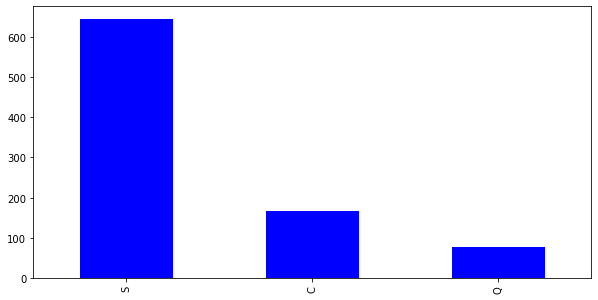

In [8]:
x= titanic['Embarked'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='blue') 

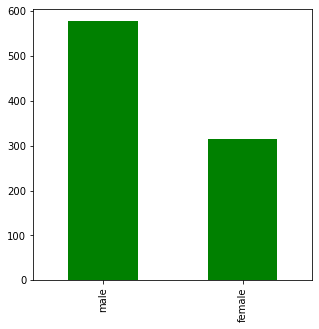

In [9]:
y= titanic['Sex'].value_counts()
y.plot(kind='bar',figsize=(5,5),color='green') ;

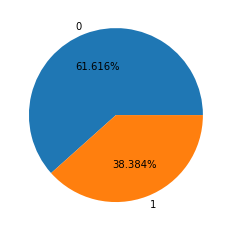

In [10]:
plt.pie(titanic['Survived'].value_counts(),
               labels = titanic['Survived'].unique(),
               autopct = '%0.3f%%');
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

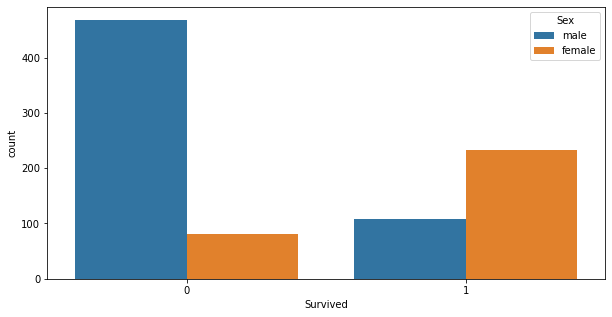

In [11]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Survived',data=titanic,hue='Sex' )

<AxesSubplot:xlabel='Survived', ylabel='count'>

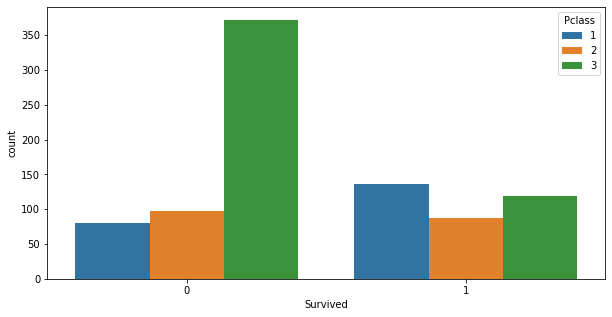

In [12]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Survived',data=titanic,hue ='Pclass' )

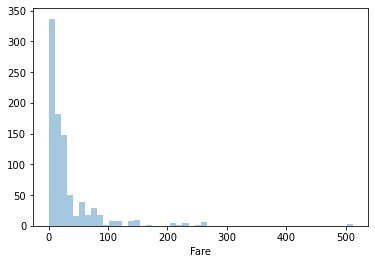

In [13]:
sns.distplot(titanic["Fare"], kde = False);

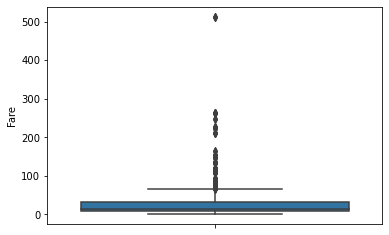

In [14]:
sns.boxplot(y='Fare', data=titanic);

In [15]:
# Treating outliers in fare column
percentiles = titanic['Fare'].quantile([0.01,0.99]).values
    # IQR
Q1 = np.percentile( titanic['Fare'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile( titanic['Fare'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 

#creating upper and lower variables column wise

Outlier_lower=(Q1-1.5*IQR)
Outlier_upper=(Q3+1.5*IQR)
    
##treatment
titanic['Fare'] =np.where( titanic['Fare'] >= (Q3+1.5*IQR),Outlier_upper, titanic['Fare'])
titanic['Fare'] =np.where( titanic['Fare'] <= (Q1-1.5*IQR),Outlier_lower, titanic['Fare'])   

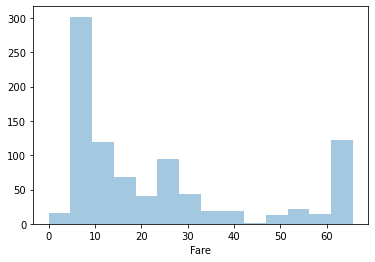

In [16]:
sns.distplot(titanic["Fare"], kde = False);

In [17]:
## getting dummy values for categorical values
categorical_col_updated = ['Embarked','Sex','Pclass']
titanic = pd.get_dummies(titanic, columns = categorical_col_updated)
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')


In [18]:
## finding out which column still has NA values
titanic.isna().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

In [19]:
## figuring the missing value out Pclass_3
l=[0,1]
for i in l:
    for j in l:
        for k in l:
            x=titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_3']==k)].median()
            y=sum(titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_3']==k)].isna())
            index=titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_3']==k)].index[titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_3']==k)].apply(np.isnan)]
            if(y>0):
                for m in index:
                    titanic.Age.iloc[m]=x

In [20]:
## figuring the missing value out Pclass_2
l=[0,1]
for i in l:
    for j in l:
        for k in l:
            x=titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_2']==k)].median()
            y=sum(titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_2']==k)].isna())
            index=titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_2']==k)].index[titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_2']==k)].apply(np.isnan)]
            if(y>0):
                for m in index:
                    titanic.Age.iloc[m]=x

In [21]:
## figuring the missing value out Pclass_1
l=[0,1]
for i in l:
    for j in l:
        for k in l:

            x=titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_1']==k)].median()
            y=sum(titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_1']==k)].isna())
            index=titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_1']==k)].index[titanic.Age[(titanic['Sex_male']==i) & (titanic['Survived']==j) & (titanic['Pclass_1']==k)].apply(np.isnan)]
            if(y>0):
                for m in index:
                    titanic.Age.iloc[m]=x

In [22]:
## finding out which column still has NA values
titanic.isna().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

In [23]:
#feature engineering
titanic['Family_Member']=titanic['Parch']+titanic['SibSp']
titanic['Family_Member']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family_Member, Length: 891, dtype: int64

In [24]:
#dropping columns as we have used them for feature engineering
titanic.drop(['SibSp'], axis = 1,inplace=True)
titanic.drop(['Parch'], axis = 1,inplace=True)

In [25]:
titanic.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Family_Member'],
      dtype='object')

In [26]:
X = titanic[['PassengerId', 'Age', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_Member']]
Y = titanic['Survived']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [28]:
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
l=[0.2,0.25,0.3]
for i in range(200):
    for j in l:
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=j,
                                                    random_state=i)
        model=LinearRegression()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
    
        if acc>maxAcc:
            maxAcc=acc
            maxRS=i
            print("R-square",maxAcc,'Random state',i,'test size',j)

R-square 0.43725442077132226 Random state 0 test size 0.2
R-square 0.44136299041895477 Random state 5 test size 0.25
R-square 0.4791950290469943 Random state 6 test size 0.2
R-square 0.48996807639565976 Random state 11 test size 0.2
R-square 0.5071083316117518 Random state 18 test size 0.2
R-square 0.5198375948288281 Random state 150 test size 0.2
R-square 0.5669259806332115 Random state 150 test size 0.25


In [29]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size = 0.25, random_state = 150)
linearRegressor = LinearRegression() 

In [30]:
linearRegressor.fit(x_train, y_train)
linearRegressor.intercept_

0.7385941089840791

In [31]:
yPrediction = linearRegressor.predict(x_test)
yPrediction

array([ 0.27485145,  0.15499921,  0.81423301,  0.68996536,  0.15415377,
        0.36670303,  0.1347546 ,  0.31999297,  0.63470738,  0.762927  ,
        0.35362203,  0.54809826,  0.14227574,  0.84555212,  0.31776884,
        0.38421608,  0.62335509,  0.35978568,  0.15476043,  0.47905155,
        0.11754423,  0.15511169,  0.61719492,  0.03386093,  0.7030727 ,
        0.6759724 ,  0.12201257,  0.61855602,  0.39961589,  0.26850912,
        0.88371082,  0.23146594,  0.51847895,  0.26909862,  0.15827225,
       -0.02421891,  0.07026227,  0.03512976,  0.11864198,  0.31985221,
        0.34045656,  0.73708278,  0.12306782,  0.1375395 ,  0.80604228,
        0.07346732,  0.13068597,  0.06355093,  0.2010732 ,  0.99959266,
        0.73294425,  0.11756805,  1.0599519 ,  0.29847629,  0.13053716,
        0.30308405,  0.29992136,  0.8457947 ,  0.38189016,  0.4104521 ,
        0.58352958,  0.48200751,  0.12375524,  0.13695417,  0.07448844,
        0.86864603,  0.12755844,  0.15117645,  0.79754139,  0.95

In [32]:
y_pred_anti=np.exp(yPrediction)
# y_act_anti=np.exp(yTrain)

In [33]:
pred = pd.DataFrame({'predicted':y_pred_anti, 'actual': y_test})
df_pred=pred.head(40)
df_pred

,actual,Predicted
633,1.316335,0
489,1.167657,1
765,2.257444,1
479,1.993646,1
285,1.166670,0
610,1.442969,0
225,1.144256,0
226,1.377118,1
259,1.886470,1
717,2.144544,1


In [37]:
# random forest with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(random_state=150)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=150),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [38]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [39]:
rfc1=RandomForestClassifier(random_state=150, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=150)

In [40]:
pred=rfc1.predict(x_test)

In [41]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8834080717488789


In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC Function
def plot_roc_curve(Y_test, model_probs):

        random_probs = [0 for _ in range(len(Y_test))]
        # calculate AUC
        model_auc = roc_auc_score(Y_test, model_probs)
        # summarize score
        print('Model: ROC AUC=%.3f' % (model_auc))
        # calculate ROC Curve
            # For the Random Model
        random_fpr, random_tpr, _ = roc_curve(Y_test, random_probs)
            # For the actual model
        model_fpr, model_tpr, _ = roc_curve(Y_test, model_probs)
        # Plot the roc curve for the model and the random model line
        plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
        plt.plot(model_fpr, model_tpr, marker='.', label='Model')
        # Create labels for the axis
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

Model: ROC AUC=0.863


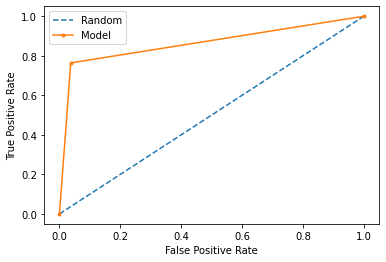

In [47]:
plot_roc_curve(y_test,pred)

In [ ]:
### svm model

In [49]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
predictions = svc_model.predict(x_test)
## getting the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[134   0]
 [ 89   0]]


In [54]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [55]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [56]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))

[[120  14]
 [ 35  54]]


In [57]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       134
           1       0.79      0.61      0.69        89

    accuracy                           0.78       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.78      0.77       223



Model: ROC AUC=0.751


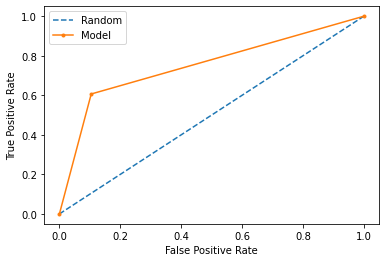

In [59]:
# Roc curve
plot_roc_curve(y_test,grid_predictions)

In [60]:
## Xgboost

In [62]:
!pip install xgboost

In [63]:
import xgboost
model = xgboost.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [64]:
xg_pred=model.predict(x_test)

In [65]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       134
           1       0.93      0.73      0.82        89

    accuracy                           0.87       223
   macro avg       0.89      0.85      0.86       223
weighted avg       0.88      0.87      0.87       223



Model: ROC AUC=0.847


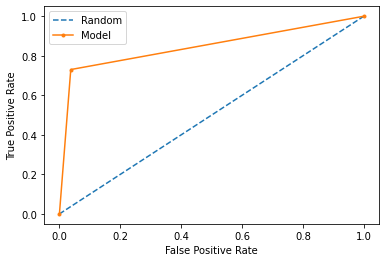

In [66]:
plot_roc_curve(y_test,xg_pred)

In [68]:
estimator =xgboost.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [69]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [70]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 60}

In [71]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=4,
              nthread=4, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)

In [72]:
xg_grid_pred=grid_search.predict(x_test)

In [73]:
print(classification_report(y_test,xg_grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       134
           1       0.94      0.75      0.84        89

    accuracy                           0.88       223
   macro avg       0.90      0.86      0.87       223
weighted avg       0.89      0.88      0.88       223



In [74]:
print(confusion_matrix(y_test,xg_grid_pred))

[[130   4]
 [ 22  67]]


Model: ROC AUC=0.861


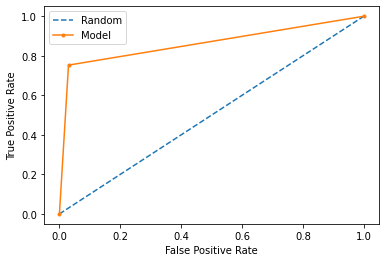

In [75]:
plot_roc_curve(y_test,xg_grid_pred)

In [76]:
%%time
import pickle
# # saved the trained model in file with given name
pickle_out = open("Titanic.pickle","wb") # name of my pickle file , wb -write
pickle.dump(rfc1, pickle_out)
pickle_out.close()

Wall time: 66 ms


In [77]:
# loading the pickeled model
pickle_in = open("Titanic.pickle","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
trained_model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)